<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---
 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import io, measure
from sklearn.cluster import KMeans

%matplotlib inline

C:\Users\haruk\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## K-means on a multi-channel image

In [2]:
image_ch_0 = io.imread("../images/002002-3608-channel-0.tif")
image_ch_1 = io.imread("../images/002002-3608-channel-1.tif")
image_ch_2 = io.imread("../images/002002-3608-channel-2.tif")
rows, cols = image_ch_0.shape
print(rows)
print(cols)

501
668


C:\Users\haruk\AppData\Local\Temp\ipykernel_9356\960758038.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


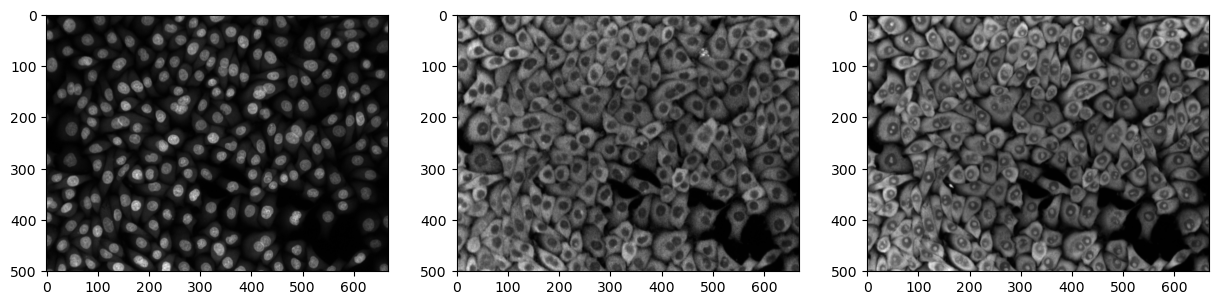

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(image_ch_0, cmap='gray')
plt.subplot(1,3, 2)
plt.imshow(image_ch_1, cmap='gray')
plt.subplot(1,3, 3)
plt.imshow(image_ch_2, cmap='gray')
plt.show()

Construct the data matrix

In [4]:
ch_0 = image_ch_0.flatten()
ch_1 = image_ch_1.flatten()
ch_2 = image_ch_2.flatten()
data = np.array([ch_0, ch_1, ch_2])
data = np.transpose(data)
print(data.shape)

(334668, 3)


### Define the estimator

Here you would need to define the number of clusters as well as the initialisation method. Refer to the documentation to learn more about the parameter settings.

In [10]:
estimator = KMeans(n_clusters=4, n_init=1, init='random')

In [11]:
estimator.fit(data)

KMeans(init='random', n_clusters=4, n_init=1)

In [12]:
labels = estimator.labels_
print(labels.shape)

(334668,)


In [13]:
label_image = np.reshape(labels, (rows, cols))

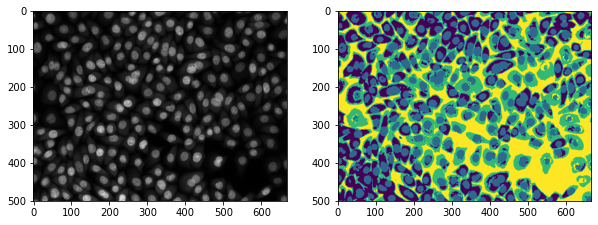

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image_ch_0, cmap='gray')
plt.subplot(1,2, 2)
plt.imshow(label_image)
plt.show()

## Generate a label image using connected components

In [15]:
labels, N = measure.label(label_image, return_num=True)

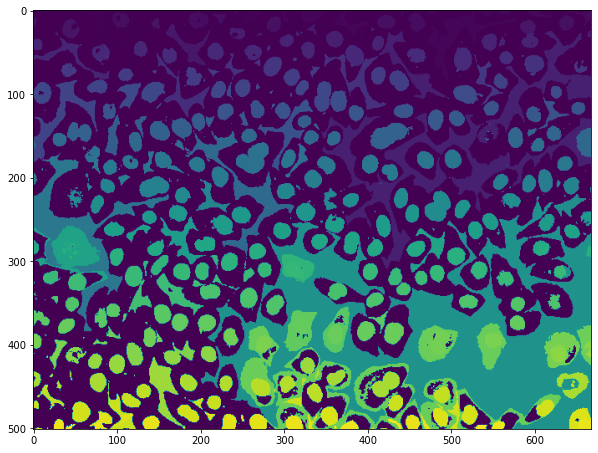

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(labels)